In [103]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [105]:
%%R


require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2



In [106]:
%%R

# Install waffle chart package
# install.packages('waffle')
require('waffle')

In [107]:
import pandas as pd

## Cumulative capacity

In [108]:
# data is from https://www.data.go.kr/data/15062347/fileData.do
# Updated as of 2022-11-17. It is updated annually.
# It lists renewable energy facilities in Jeju island.


df = pd.read_csv('제주특별자치도_신재생에너지발전시설현황_20221116.csv', encoding="EUC-KR")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   허가일자      1582 non-null   object 
 1   상호        1582 non-null   object 
 2   설비용량(KW)  1582 non-null   float64
 3   설치장소      1582 non-null   object 
 4   원동력종류     1582 non-null   object 
 5   사업개시일     1582 non-null   object 
 6   데이터기준일자   1582 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.6+ KB


In [110]:
df['year'] = df['사업개시일'].str[:4]


In [111]:
df.drop(['허가일자', '데이터기준일자', '사업개시일'], axis=1, inplace=True)


In [112]:
wind = df[df.원동력종류=="풍력"]
solar= df[df.원동력종류=="태양광"]

In [113]:
wind_yearly = wind.groupby('year')['설비용량(KW)'].sum().reset_index()#.drop([0, 1, 2], axis=0, inplace=True)


In [114]:
solar_yearly = solar.groupby('year')['설비용량(KW)'].sum().reset_index()

In [115]:
solar_yearly

,year,설비용량(KW)
0,2006,89.39
1,2007,169.08
2,2008,1417.04
3,2009,3029.42
4,2010,1026.31
5,2011,485.12
6,2012,2793.84
7,2013,5561.63
8,2014,37397.70
9,2015,22310.69


In [116]:
wind_yearly

,year,설비용량(KW)
0,2000,3480.0
1,2004,6000.0
2,2006,3200.0
3,2007,15000.0
4,2009,33000.0
5,2010,10750.0
6,2012,15000.0
7,2013,10810.0
8,2014,14000.0
9,2015,93000.0


In [117]:
wind_yearly['wind_cumsum'] = wind_yearly['설비용량(KW)'].cumsum()
solar_yearly['solar_cumsum'] = solar_yearly['설비용량(KW)'].cumsum()

In [118]:
solar_yearly

,year,설비용량(KW),solar_cumsum
0,2006,89.39,89.39
1,2007,169.08,258.47
2,2008,1417.04,1675.51
3,2009,3029.42,4704.93
4,2010,1026.31,5731.24
5,2011,485.12,6216.36
6,2012,2793.84,9010.20
7,2013,5561.63,14571.83
8,2014,37397.70,51969.53
9,2015,22310.69,74280.22


In [119]:
re_yearly = solar_yearly.merge(wind_yearly, on='year', how='left')

In [120]:
re_yearly

,year,설비용량(KW)_x,solar_cumsum,설비용량(KW)_y,wind_cumsum
0,2006,89.39,89.39,3200.0,12680.0
1,2007,169.08,258.47,15000.0,27680.0
2,2008,1417.04,1675.51,NaN,NaN
3,2009,3029.42,4704.93,33000.0,60680.0
4,2010,1026.31,5731.24,10750.0,71430.0
5,2011,485.12,6216.36,NaN,NaN
6,2012,2793.84,9010.20,15000.0,86430.0
7,2013,5561.63,14571.83,10810.0,97240.0
8,2014,37397.70,51969.53,14000.0,111240.0
9,2015,22310.69,74280.22,93000.0,204240.0


In [121]:
re_yearly.columns = ['year', 'solar', 'solar_cumsum', 'wind', 'wind_cumsum']
re_yearly['wind_cumsum'].fillna(re_yearly['wind_cumsum'].shift(1), inplace=True)
re_yearly['wind_cumsum'].fillna(re_yearly['wind_cumsum'].shift(1), inplace=True)
re_yearly['wind'].fillna(0, inplace=True)

In [122]:
re_yearly['wind_solar_cumsum'] = re_yearly.solar_cumsum + re_yearly.wind_cumsum

In [123]:
re_yearly = re_yearly.round(0)

In [124]:
re_yearly

,year,solar,solar_cumsum,wind,wind_cumsum,wind_solar_cumsum
0,2006,89.0,89.0,3200.0,12680.0,12769.0
1,2007,169.0,258.0,15000.0,27680.0,27938.0
2,2008,1417.0,1676.0,0.0,27680.0,29356.0
3,2009,3029.0,4705.0,33000.0,60680.0,65385.0
4,2010,1026.0,5731.0,10750.0,71430.0,77161.0
5,2011,485.0,6216.0,0.0,71430.0,77646.0
6,2012,2794.0,9010.0,15000.0,86430.0,95440.0
7,2013,5562.0,14572.0,10810.0,97240.0,111812.0
8,2014,37398.0,51970.0,14000.0,111240.0,163210.0
9,2015,22311.0,74280.0,93000.0,204240.0,278520.0


In [125]:
re_yearly.to_csv('jeju-re-cumsum.csv', index=False)

## Energy Mix (Exchange volume by Energy Source)

In [126]:
exchange = pd.read_csv("한국전력거래소_제주 연료원별 전력거래량_20220430.csv", encoding="EUC-KR")

In [127]:
exchange

,거래일,거래시간,연료원,전력거래량(MWh)
0,2021-01-01,1,바이오가스,0.190656
1,2021-01-01,2,바이오가스,0.190560
2,2021-01-01,3,바이오가스,0.190608
3,2021-01-01,4,바이오가스,0.192768
4,2021-01-01,5,바이오가스,0.190176
...,...,...,...,...
139675,2022-04-30,20,바이오중유,206.658872
139676,2022-04-30,21,바이오중유,206.628408
139677,2022-04-30,22,바이오중유,206.761856
139678,2022-04-30,23,바이오중유,201.381712


In [128]:
exchange.연료원.unique()

array(['바이오가스', '소수력', '매립가스', '중유', '태양광', '폐기물', '풍력', 'LNG', '경유',
       '해양에너지', '바이오매스', '바이오중유'], dtype=object)

### Create Waffle chart of Jeju energy mix

Data is from https://www.youtube.com/watch?v=95wTYIDXhuU -> Need to check for updated numbers

In [129]:
energy_mix = pd.read_csv("jeju_capacity_generation_percent.csv", encoding="EUC-KR")

In [130]:
energy_mix['capacity_waffle'] = energy_mix['capacity(%)'] * 5
energy_mix['generation_waffle'] = energy_mix['generation(%)'] * 5

In [131]:
energy_mix

,type,capacity(%),generation(%),capacity_waffle,generation_waffle
0,central thermal plants,42.2,51.2,211.0,256.0
1,renewable,39.3,18.2,196.5,91.0
2,HVDC,18.5,30.6,92.5,153.0


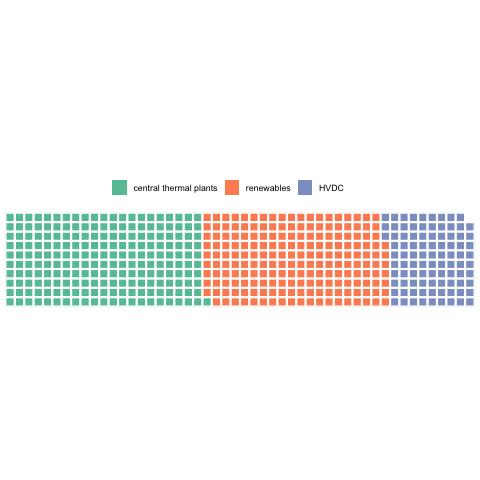

In [132]:
%%R 

capacity <- c(
  `central thermal plants` = 211, `renewables` = 196.5,
  `HVDC` = 92.5
)

waffle(capacity, rows = 10, size=1, legend_pos = "top")

# ggsave("capacity_waffle.pdf")

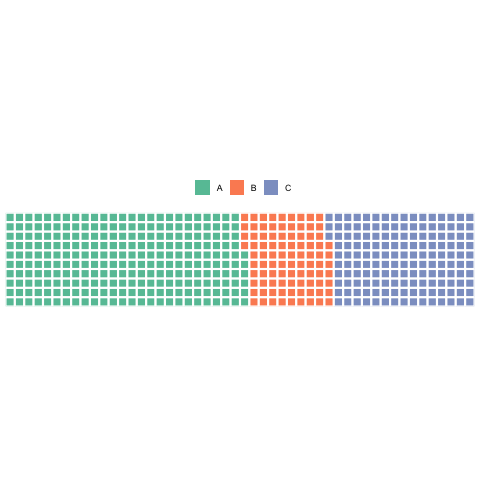

In [133]:
%%R -i energy_mix


# waffle(
#   savings / 392, rows = 7, size = 0.5, legend_pos = "bottom",
#   colors = c("#c7d4b6", "#a3aabd", "#a0d0de", "#97b5cf")
# )

waffle(energy_mix$'generation_waffle', rows = 10, size=1, legend_pos = "top")

# ggsave("generation_waffle.pdf")

## Yearly Wind Curtailment

In [145]:
curtailment = pd.read_csv("wind_curtailment_frequency.csv")

In [146]:
curtailment

,year,Frequency of wind energy curtailment
0,2015,3
1,2016,6
2,2017,14
3,2018,15
4,2019,46
5,2020,77
6,2021,64
7,2022,103


In [148]:
%%R -i curtailment

curtailment

# ggplot(curtailment) +
  # aes(x=year, y='Frequency of wind energy curtailment') +
  # geom_point() 
  # geom_segment( aes(x=year, xend=year, y=0, yend='Frequency of wind energy curtailment'))

  year Frequency of wind energy curtailment
0 2015                                    3
1 2016                                    6
2 2017                                   14
3 2018                                   15
4 2019                                   46
5 2020                                   77
6 2021                                   64
7 2022                                  103


## Yearly Generation

In [95]:
gen_df = pd.read_csv('jeju_re_generation.csv', encoding="EUC-KR")

In [99]:
gen_df_re = gen_df[(gen_df['신재생에너지별(1)']=="태양광 (MWh)") | (gen_df['신재생에너지별(1)']=="풍력 (MWh)")]

In [103]:
gen_df_re_transposed = gen_df_re.T.reset_index()

In [104]:
gen_df_re_transposed

,index,1,14
0,신재생에너지별(1),태양광 (MWh),풍력 (MWh)
1,신재생에너지별(2),소계,소계
2,2014,22030,247161
3,2015,74002,352001
4,2016,18979,51000
5,2017,170627,537994
6,2018,227832,536566
7,2019,363780,549944
8,2020,489629,578059


In [105]:
new_header = gen_df_re_transposed.iloc[0] #grab the first row for the header
gen_df_re_transposed = gen_df_re_transposed[1:] #take the data less the header row
gen_df_re_transposed.columns = new_header #set the header row as the df header

In [108]:
gen_df_re_transposed.drop(1, axis=0, inplace=True)

/var/folders/_c/dcjy1m9109bd_sq8l8j8zsdr0000gn/T/ipykernel_4161/3999002798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df_re_transposed.drop(1, axis=0, inplace=True)


In [110]:
gen_df_re_transposed.columns = ['year', 'solar(MWh)', 'wind(MWh)']

In [112]:
gen_df_re_transposed.to_csv("yearly_generation.csv", index=False)